Les réclamations d'assurance constituent une source précieuse d'information pour mieux comprendre les risques associés aux différents profils de clients et contextes de sinistres. Dans le secteur de l'assurance, analyser ces données peut fournir des insights stratégiques essentiels pour optimiser la gestion des risques, ajuster les politiques de couverture et anticiper les besoins des assurés.

L'objectif de cette étude est double : d'une part, extraire des insights à partir des données de réclamations afin de mieux comprendre les facteurs clés qui influencent le coût des réclamations. D'autre part, trouver un modèles de prédiction des coûts pour fournir des estimations précises. Ce travail vise à informer la stratégie de gestion des sinistres et à identifier les leviers potentiels pour une meilleure segmentation des risques.

Les données étudiées contiennent des informations sur divers aspects des réclamations : géographiques, démographiques et spécifiques au type de maladie ou d'accident. Ces variables seront explorées en profondeur pour comprendre leur influence et leur interaction dans le contexte des réclamations d'assurance.

Données :

- age : L'âge de l'assuré (Numérique)
- sex : Le sexe de l'assuré (Catégorique)
- weight : Le poids de l'assuré (Numérique)
- bmi : L'indice de masse corporelle (IMC) (Numérique)
- no_of_dependents : Nombre de personnes à charge de l'assuré (Numérique)
- smoker : Indique si l'assuré  est fumeur ou non (Catégorique : non-fumeur = 0 ; fumeur = 1)
- claim : Montant réclamé par de l'assuré (Numérique)
- bloodpressure : Lecture de la pression artérielle de l'assuré (Numérique)
- diabetes : Indique si l'assuré souffre de diabète ou non (Catégorique : non-diabétique = 0 ; diabétique = 1)
- regular_ex : L'assuré fait-il de l'exercice régulièrement ? (Catégorique : pas d'exercice = 0 ; exercice = 1)
- job_title : Profession de l'assuré (Catégorique)
- city : La ville où réside l'assuré (Catégorique)
- hereditary_diseases : L'assuré souffre-t-il de maladies héréditaires ? (Catégorique)


L'analyse présentée dans ce rapport utilise le dataset fourni par Suresh Gupta et peut être consultée à l'adresse suivante : https://www.kaggle.com/datasets/sureshgupta/health-insurance-data-set/data .

**Introduction**
1. **Préparation des données**
   1. Importation des packages et des données
   2. Vérification de la structure
   3. Présence de valeurs manquantes
   4. Recherche de doublons

2. **Analyse : Visualisation des données**
   1. Distribution des réclamations
   2. Distribution de l'âge
   3. Distribution du sexe
   4. Distribution par IMC
   5. Distribution des fumeurs
   6. Distribution par villes
   7. Distribution par maladie
   8. Distribution par métier
   9. Matrice de corrélation

3. **Modélisation des réclamations d'assurance**
   1. Sélection des caractéristiques pertinentes
   2. Diviser les données en ensembles d'entraînement et de test
   3. Choix des modèles de prédiction
      - Régression Linéaire
      - Gradient Boosting Regressor
      - Random Forest Regressor
      - Support Vector Regressor (SVR)
   4. Évaluation des performances des modèles
   5. Analyse des résidus et validation du modèle
   6. Evaluation du modèle
   
**Conclusion**

## I. Préparation des données

Dans cette section, nous allons préparer les données en vérifiant leur qualité et leur structure. Cette étape de préparation est essentielle pour identifier d'éventuelles valeurs manquantes, doublons ou incohérences, et garantir ainsi la fiabilité des analyses qui suivront.

### 1. Importation des packages et des données

In [ ]:
#Importation de bibliothèques pour la gestion des données et les visualisations
# - NumPy : pour la manipulation de tableaux et les calculs numériques avancés
# - pandas : pour la gestion, le traitement et l'analyse de données tabulaires
# - matplotlib.pyplot : pour la création de graphiques basiques et personnalisés
# - seaborn : pour des visualisations statistiques améliorées et esthétiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliothèques pour la création d'applications web interactives et de visualisations
# - Dash : pour créer des applications web interactives en Python
# - Plotly Express : pour simplifier la création de graphiques interactifs (barres, nuages de points, etc.)
# - dcc (Dash Core Components) : fournit des composants interactifs comme des graphiques, menus déroulants, sliders, etc.
# - html : pour structurer la mise en page des applications Dash avec des éléments HTML
import dash
import plotly.express as px
from dash import dcc, html, Input, Output

# Bibliothèques pour la prétraitement des données et la modélisation
# - preprocessing (scikit-learn) : outils pour la transformation des données (ex. mise à l'échelle)
# - SelectKBest : pour sélectionner les meilleures caractéristiques selon un score
# - f_regression : pour évaluer la corrélation entre caractéristiques et variable cible en régression
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression

# Outils pour la préparation des données et la recherche d'hyperparamètres
# - train_test_split : pour diviser les données en ensembles d'entraînement et de test
# - GridSearchCV : pour optimiser les hyperparamètres des modèles via validation croisée
from sklearn.model_selection import train_test_split, GridSearchCV

# Importation de modèles de régression pour prédire les montants des réclamations
# - LinearRegression : modèle de régression linéaire
# - GradientBoostingRegressor : modèle de boosting par gradients
# - RandomForestRegressor : modèle de régression par forêts aléatoires
# - SVR (Support Vector Regressor) : modèle de régression par machines à vecteurs de support
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

# Importation d'outils de prétraitement et d'augmentation des caractéristiques
# - StandardScaler : mise à l'échelle des caractéristiques
# - OneHotEncoder : encodage des variables catégorielles en vecteurs binaires
# - PolynomialFeatures : génération de nouvelles caractéristiques polynomiales
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Importation de fonctions d'évaluation de la performance des modèles
# - mean_squared_error : pour calculer l'erreur quadratique moyenne
# - r2_score : pour calculer le coefficient de détermination (R²)
# - mean_absolute_error : pour calculer l'erreur absolue moyenne
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialisation de l'application Dash
app = dash.Dash(__name__)

In [190]:
# Lecture des données depuis le fichier CSV
df_original = pd.read_csv('healthinsurance.csv')
df = df_original.copy()  # Copie du DataFrame d'origine pour les possibles transformations futures
print(df)

        age     sex  weight   bmi hereditary_diseases  no_of_dependents  \
0      60.0    male      64  24.3           NoDisease                 1   
1      49.0  female      75  22.6           NoDisease                 1   
2      32.0  female      64  17.8            Epilepsy                 2   
3      61.0  female      53  36.4           NoDisease                 1   
4      19.0  female      50  20.6           NoDisease                 0   
...     ...     ...     ...   ...                 ...               ...   
14995  39.0    male      49  28.3           NoDisease                 1   
14996  39.0    male      74  29.6           NoDisease                 4   
14997  20.0    male      62  33.3           NoDisease                 0   
14998  52.0    male      88  36.7           NoDisease                 0   
14999  52.0    male      57  26.4           NoDisease                 3   

       smoker         city  bloodpressure  diabetes  regular_ex  \
0           0      NewYork      

## 2. Vérification de la structure

Dans cette section, nous allons examiner la structure des données afin de nous assurer qu'elles sont bien organisées et conformes aux attentes initiales. Cette vérification nous permet de détecter d'éventuelles anomalies ou incohérences dans les types de variables et dans la cohérence générale des informations.

In [191]:
# Afficher les premières lignes du DataFrame pour un aperçu rapide des données
# Afficher des informations générales sur le DataFrame (nombre de lignes, types de données, valeurs manquantes, ...)
# Afficher des statistiques descriptives des colonnes numériques (moyenne, écart-type, min, max, ...)

print(f"Affichage des premières lignes : {df.head()}") 
print(f"Affichages des informations générales {df.info()}")
print(f"Affichages des statistiques descriptives {df.describe()}")

print(f"Le nombre de colonnes est de {df.shape[0]}.")
print(f"Le nombre de lignes est de {df.shape[1]}.")


Affichage des premières lignes :     age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7  
<class 'pandas.core.frame.DataFrame'

### 3. Présence de valeurs manquantes 

Dans cette sous-partie, nous allons vérifier la présence de valeurs manquantes dans le jeu de données. Identifier et traiter ces valeurs est crucial pour éviter des biais dans l’analyse et améliorer la précision des modèles prédictifs.

In [192]:
# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum()) 

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64


#### Valeurs manquantes dans les colonnes "age" et "bmi"

Il y a **396 valeurs manquantes** dans la colonne **"age"** et **956 valeurs manquantes** dans la colonne **"bmi"**.

#### Vérification de l'asymétrie des données pour décider de l'imputation des colonnes contenant des valeurs manquantes

L'asymétrie mesure la symétrie d'une distribution de données. En d'autres termes, elle indique si les valeurs d'une distribution sont équilibrées autour de la moyenne ou si elles sont décalées vers une extrémité.

- **Asymétrie nulle** : La distribution est symétrique (comme une distribution normale). L'indice de symétrie sera entre -0.5 et 0.5.
- **Asymétrie positive** : La queue de la distribution s'étend davantage vers les valeurs élevées, indiquant que la majorité des valeurs sont inférieures à la moyenne.
- **Asymétrie négative** : La queue de la distribution s'étend davantage vers les valeurs faibles, ce qui signifie que la majorité des valeurs sont supérieures à la moyenne.

**Choix de la méthode d'imputation** :
- **Imputation basée sur la moyenne** : Cette méthode fonctionne bien lorsque les données sont **symétriques** (asymétrie proche de 0) ou **modérément asymétriques**. Cependant, si les données présentent une forte asymétrie (positive ou négative), la moyenne peut être influencée par les valeurs extrêmes, ce qui pourrait fausser l’imputation.
- **Imputation basée sur la médiane** : La médiane est **moins influencée par les valeurs extrêmes** et peut être plus appropriée lorsque la distribution est **fortement asymétrique**. Si les données sont très asymétriques, l'imputation par la médiane peut donner des résultats plus représentatifs du "centre" des données.


In [193]:
# Liste des colonnes à transformer dans le DataFrame
columns = ['hereditary_diseases', 'job_title', 'city', 'sex'] 

# Dictionnaire pour stocker les encodeurs et leurs classes pour chaque colonne
encoders = {}
correspondances = {}

# Boucle à travers chaque nom de colonne dans la liste "columns"
for col in columns:
    # Création d'un encodeur de labels pour la colonne actuelle
    encoder = preprocessing.LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Appliquer l'encodage à la colonne
    encoders[col] = encoder  # Stocker l'encodeur dans le dictionnaire

    # Construction d'une table de correspondance pour la colonne actuelle
    correspondance = pd.DataFrame({
        'Original': df_original[col],
        'Encoded': df[col]
    }).drop_duplicates().sort_values(by="Encoded")  # Supprime les doublons et trie
    correspondances[col] = correspondance  # Ajoute la correspondance au dictionnaire

    # Affiche la table de correspondance pour la colonne actuelle
    print(f"\nCorrespondances pour la colonne '{col}':")
    print(correspondance)


Correspondances pour la colonne 'hereditary_diseases':
         Original  Encoded
27      Alzheimer        0
37      Arthritis        1
164        Cancer        2
148      Diabetes        3
2        Epilepsy        4
10     EyeDisease        5
124  HeartDisease        6
190       High BP        7
0       NoDisease        8
309       Obesity        9

Correspondances pour la colonne 'job_title':
              Original  Encoded
2          Academician        0
37          Accountant        1
0                Actor        2
66             Analyst        3
51           Architect        4
28          Beautician        5
30             Blogger        6
59         Buisnessman        7
29                  CA        8
31                 CEO        9
3                 Chef       10
78              Clerks       11
5               Dancer       12
9        DataScientist       13
61   DefencePersonnels       14
14              Doctor       15
1             Engineer       16
95              Farmer   

In [194]:
# Affichage des premières lignes du DataFrame transformé pour vérification
print("\nAffichage des premières lignes du DataFrame transformé :", df.head())


Affichage des premières lignes du DataFrame transformé :     age  sex  weight   bmi  hereditary_diseases  no_of_dependents  smoker  \
0  60.0    1      64  24.3                    8                 1       0   
1  49.0    0      75  22.6                    8                 1       0   
2  32.0    0      64  17.8                    4                 2       1   
3  61.0    0      53  36.4                    8                 1       1   
4  19.0    0      50  20.6                    8                 0       0   

   city  bloodpressure  diabetes  regular_ex  job_title    claim  
0    55             72         0           0          2  13112.6  
1     5             78         1           1         16   9567.0  
2    63             88         1           1          0  32734.2  
3    64             72         1           0         10  48517.6  
4     8             82         1           0         22   1731.7  


In [195]:
# Vérification de l'asymétrie des colonnes numériques
df[['age', 'bmi']].skew() 

age    0.005577
bmi    0.375259
dtype: float64

Comme les données des colonnes âge et IMC ont un indice d'asymétrie proche de 0 (0.006 et 0.4), nous pouvons conclure qu'elles sont relativement symétriques. Ainsi, nous allons imputer les valeurs nulles en utilisant la moyenne.

In [196]:
# Remplir les valeurs manquantes
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Vérifier la forme après remplissage
print("Shape après remplissage :", df.shape)

#Pas de perte de données

Shape après remplissage : (15000, 13)


### 4. Recherche de doublons 

Dans cette section, nous allons rechercher les doublons au sein des données. L’identification et la gestion des doublons sont cruciales pour éviter les biais.

In [197]:
# Trouver les doublons
print(df.duplicated().sum())  

# Affiche les doublons
df[df.duplicated()]
df = df.drop_duplicates()
# Supprimer les doublons si nécessaire
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())  
print("Shape après remplissage :", df.shape)

1096
0
Shape après remplissage : (13904, 13)


## II. Analyse : Visualisation des données

Dans cette section, nous allons examiner les différentes distributions et relations au sein des données. La visualisation des données nous permettra d'obtenir des informations précieuses pour mieux comprendre notre jeu de données.

### 1. Distribution des réclamations (CLAIMS)

Nous commencerons par analyser la distribution des réclamations, qui est notre variable cible. Cela nous aidera à comprendre comment les réclamations sont réparties et à identifier d'éventuelles anomalies ou tendances.

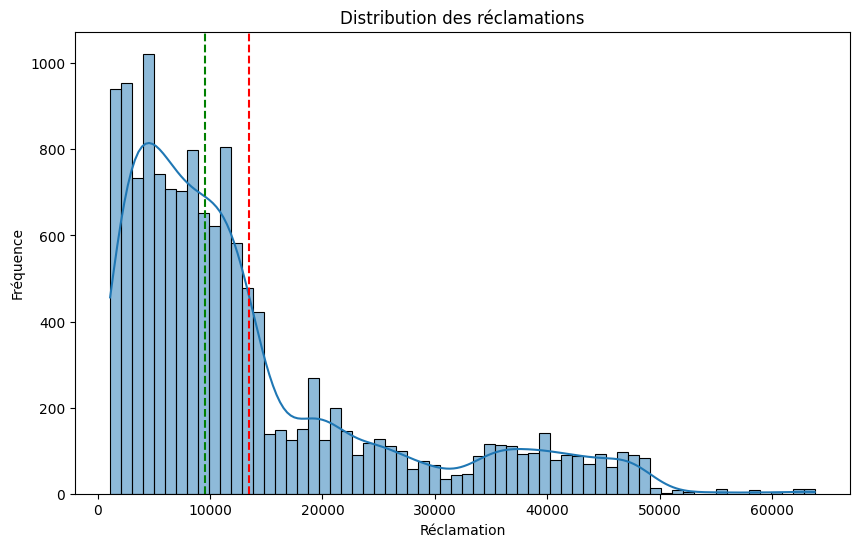

Moyenne des réclamations : 13431.813744246261
Asymétrie des réclamations : 1.489221351406612
Médiane : 9567.0


In [198]:
plt.figure(figsize=(10, 6))

# Création d'un histogramme de la distribution des réclamations avec une estimation de la densité (KDE)
sns.histplot(x='claim', data=df, kde=True)

# Ajout d'une ligne verticale représentant la moyenne des réclamations et une pour la médiane des réclamations
plt.axvline(df.claim.mean(), color='r', linestyle='--', label='Moyenne')
plt.axvline(df.claim.median(), color='g', linestyle='--', label='Médiane')

# Légende
plt.title('Distribution des réclamations')
plt.xlabel('Réclamation')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.show()

# Calcul et affichage de la moyenne et de l'asymétrie des réclamations
mean_claim = df['claim'].mean()  # Moyenne des réclamations
skewness_claim = df['claim'].skew()  # Asymétrie des réclamations

# Impression des résultats
print(f"Moyenne des réclamations : {mean_claim}")
print(f"Asymétrie des réclamations : {skewness_claim}")
print(f'Médiane : {df["claim"].median()}')


En moyenne, les réclamations des clients, d'après la colonne claim du DataFrame, s'élèvent à environ 13 431 dollars. Cependant, un certain nombre de clients déclarent des montants supérieurs à 60 000 dollars, ce qui représente des valeurs aberrantes. Ces valeurs provoquent une asymétrie à droite de la distribution des réclamations. Cette observation a été confirmée par un coefficient d'asymétrie (skewness) de 1,48, obtenu en analysant la distribution à l'aide d'un histogramme enrichi d'une estimation de la densité (KDE).(Moyenne > Médiane et asymétrie positive montrent que la distribution est influencée par des valeurs extrêmes élevées.)

### 2. Distribution de l'âge (AGE)

Ensuite, nous examinerons la distribution de l'âge. Cela nous permettra de voir la répartition des âges au sein de notre population et d'identifier des groupes d'âge spécifiques qui pourraient influencer les réclamations.

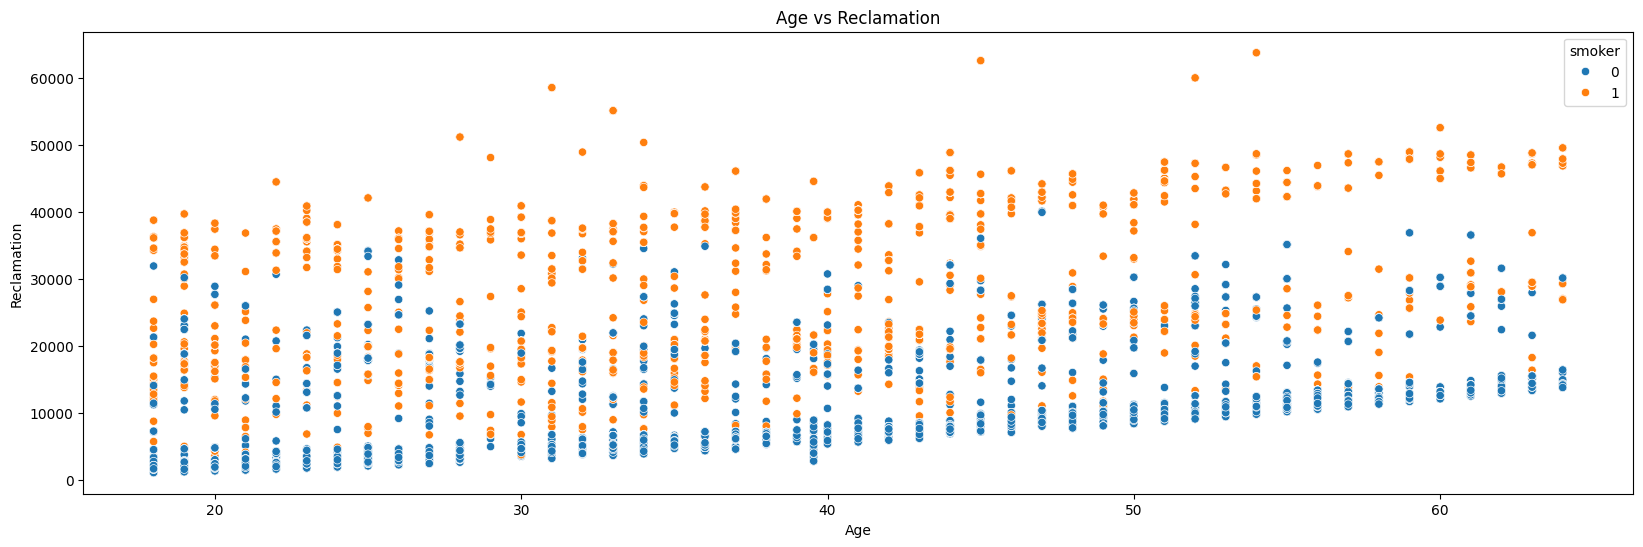

Asymétrie: 0.006241188212225505
Moyenne: 40
Médiane: 40.0
Age minimum: 18.0
Age maximum: 64.0
Le coefficient de corrélation entre l'âge et les réclamations est de : 0.30


In [199]:
plt.figure(figsize=(20, 6))

# Création d'un nuage de points (scatter plot) avec la bibliothèque Seaborn
# - x='age' : l'âge est représenté sur l'axe des abscisses
# - y='Reclamation' : le montant des réclamations est représenté sur l'axe des ordonnées
# - data=df : le DataFrame utilisé est df
# - hue='smoker' : les points sont colorés en fonction de la colonne 'smoker' (fumeurs/non-fumeurs), permettant de différencier ces deux groupes
sns.scatterplot(x='age', y='claim', data=df, hue='smoker')

# Légende
plt.title('Age vs Reclamation')
plt.xlabel('Age')
plt.ylabel('Reclamation')

# Affichage du graphique
plt.show()

# Affichage des valeurs moyenne, médiane, ...
print(f'Asymétrie: {df["age"].skew()}')
print(f'Moyenne: {(df["age"].mean()):.0f}')
print(f'Médiane: {df["age"].median()}')
print(f'Age minimum: {df["age"].min()}')
print(f'Age maximum: {df["age"].max()}')

# Calculer la corrélation entre l'âge et les réclamations
correlation = df['age'].corr(df['claim'])
print(f'Le coefficient de corrélation entre l\'âge et les réclamations est de : {correlation:.2f}')

L'analyse des données relatives à l'âge révèle une distribution équilibrée et symétrique. L'asymétrie, qui est de 0,006, est pratiquement nulle, ce qui indique une répartition homogène des âges autour de la moyenne. La moyenne et la médiane, toutes deux établies à 40 ans, signifient que la moitié des clients ont moins de 40 ans, tandis que l'autre moitié en a plus. L'âge des clients varie entre 18 et 64 ans, ce qui témoigne d'une large diversité d'âges. En somme, la distribution de l'âge est bien centrée, sans décalage significatif vers les valeurs extrêmes.

En examinant le nuage de points, on constate une corrélation positive modérée de 0,3 entre l'âge et les réclamations : à mesure que l'âge du client augmente, le montant de ses réclamations tend également à augmenter. De plus, il est évident que les réclamations des fumeurs sont nettement plus élevées que celles des non-fumeurs, suggérant que le statut de fumeur pourrait jouer un rôle important dans les montants des réclamations.

### 3. Distribution du sexe (GENDER)

La visualisation de la distribution du sexe nous aidera à comprendre la répartition des hommes et des femmes dans notre jeu de données, ce qui peut avoir un impact sur les réclamations et les résultats d'analyse.

sex
0    7091
1    6813
Name: count, dtype: int64


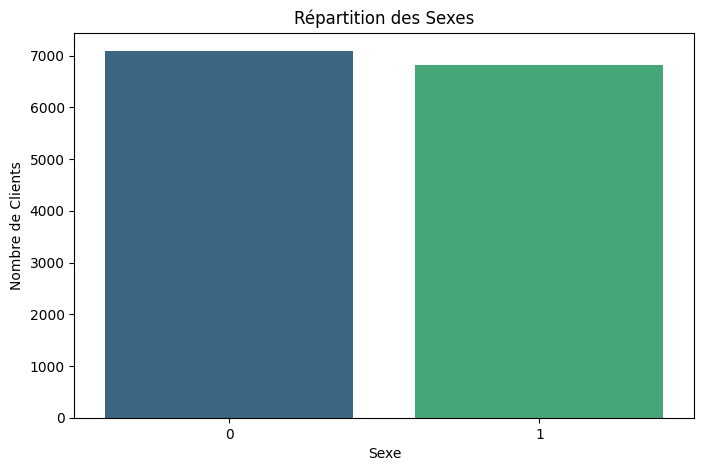

In [200]:
# Compter le nombre d'hommes et de femmes
gender_distribution = df['sex'].value_counts()

# Affichage de la répartition
print(gender_distribution)

# Création d'un graphique à barres
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, hue=gender_distribution.index, palette='viridis', legend=False)
plt.title('Répartition des Sexes')
plt.xlabel('Sexe')
plt.ylabel('Nombre de Clients')
plt.show()

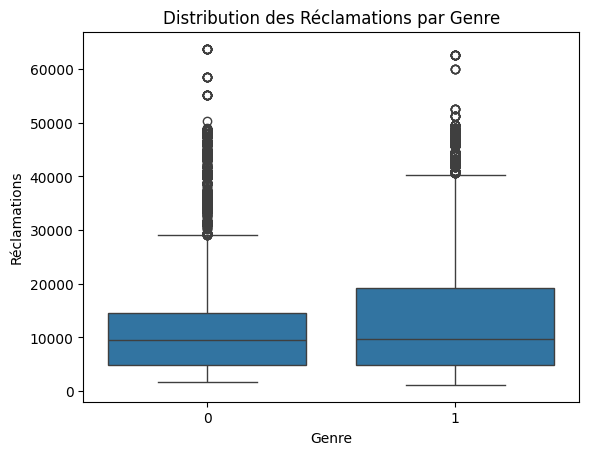

In [201]:
# Création d'un boxplot pour visualiser la distribution des réclamations (claim) en fonction du genre (sex)
sns.boxplot(x='sex', y='claim', data=df)

# Légende
plt.title('Distribution des Réclamations par Genre')
plt.xlabel('Genre')
plt.ylabel('Réclamations')

# Affichage du graphique
plt.show()


In [202]:
# Calcul de la moyenne des réclamations par genre et par statut de fumeur
moyenne_reclamations_par_genre_et_fumeur = df.groupby(['sex', 'smoker'])['claim'].mean().reset_index()

# Afficher les résultats
print(moyenne_reclamations_par_genre_et_fumeur)

   sex  smoker         claim
0    0       0   8994.773808
1    0       1  30829.400738
2    1       0   8465.285006
3    1       1  33088.837046


In [203]:
# Compter le nombre de fumeurs par genre
fumeur_par_genre = df.groupby(['sex', 'smoker']).size().unstack()

# Affichage du résultat
print(fumeur_par_genre)

smoker     0     1
sex               
0       5872  1219
1       5242  1571


Le nombre de clients masculins et féminins est relativement équilibré, avec 6813 hommes et 7091 femmes. Cependant, une analyse plus approfondie des coûts de réclamation révèle une différence significative. La moyenne des réclamations pour les clients masculins s'élève à environ 14 143 dollars, tandis que celle des clientes féminines est d'environ 12 748 dollars. Cette disparité pourrait s'expliquer par une proportion plus élevée de fumeurs parmi les hommes comparativement aux femmes.

En effet, les données montrent que les hommes fumeurs ont des réclamations moyennes de 33 088,84 dollars, contre 30 829,40 dollars pour les femmes fumeuses. De plus, il convient de noter qu'il y a un nombre considérable de fumeurs parmi les clients masculins, ce qui accentue l'impact du tabagisme sur le montant des réclamations. Cela indique une tendance où les hommes, en raison de leur statut de fumeur, tendent à avoir des coûts de réclamation plus élevés par rapport aux femmes.

### 3. Distribution de l'IMC (BMI)

Nous analyserons également la distribution de l'indice de masse corporelle (IMC) pour déterminer comment les différentes catégories de poids sont représentées et si cela pourrait avoir une incidence sur les réclamations.

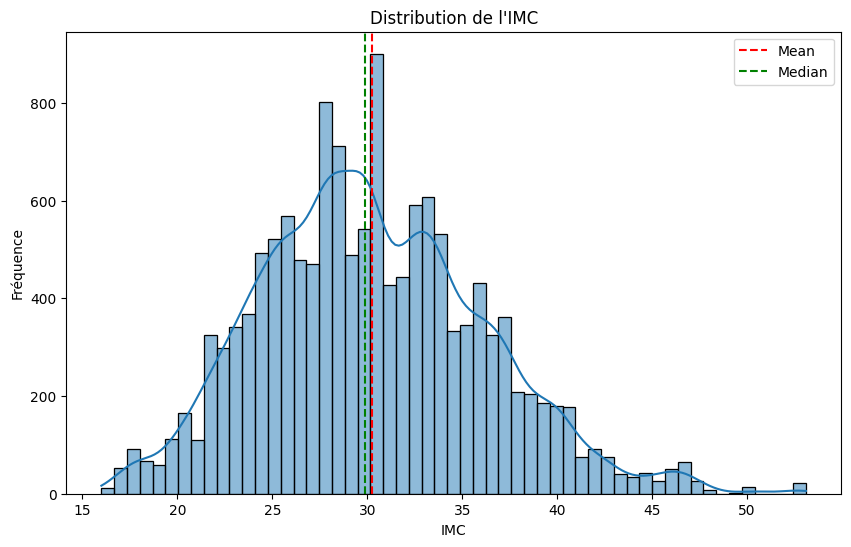

In [204]:
plt.figure(figsize=(10, 6))

# Création d'un histogramme de la distribution de l'IMC avec une estimation de la densité (KDE)
sns.histplot(x='bmi', data=df, kde=True)

# Ajout d'une ligne verticale pour représenter la moyenne et la médiane de l'IMC
plt.axvline(df.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df.bmi.median(), color='g', linestyle='--', label='Median')

# Légende
plt.title('Distribution de l\'IMC')
plt.xlabel('IMC')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.legend()
plt.show()

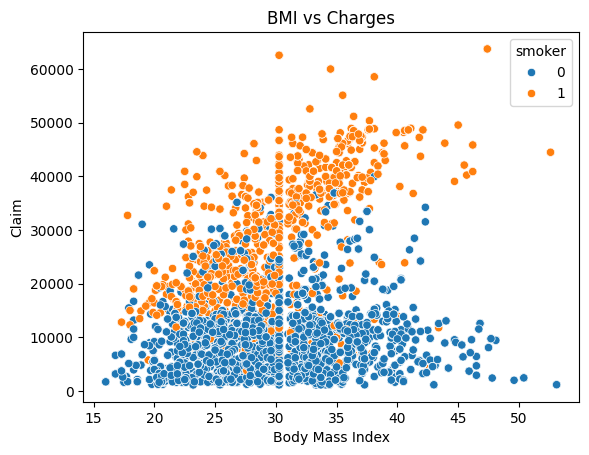

Skewness: 0.390556118762522
Mean: 30.273024873802015
Median: 29.9


In [205]:
sns.scatterplot(x='bmi', y='claim', data=df, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Claim')
plt.show()
print(f'Skewness: {df["bmi"].skew()}')
print(f'Mean: {(df["bmi"].mean())}')
print(f'Median: {df["bmi"].median()}')

L'analyse des données révèle que l'indice de masse corporelle (IMC) moyen de la clientèle se situe approximativement à 30 kg/m². La distribution de l'IMC présente une courbe gaussienne, avec une occurrence marginale de valeurs atypiques, permettant ainsi de les considérer comme statistiquement non significatives.
L'examen du diagramme de dispersion met en évidence une corrélation positive faible entre l'IMC et les montants des réclamations. Cette observation suggère que, pour la population non-fumeuse de la clientèle, une augmentation de l'IMC n'est pas associée à une hausse substantielle des réclamations.
En revanche, au sein des clients fumeurs, on constate une tendance différente : un IMC plus élevé est corrélé à des montants de réclamations supérieurs.
Ces résultats soulignent l'importance de considérer l'interaction entre le statut tabagique et l'IMC dans l'évaluation des risques et la gestion des réclamations.

### 4. Distribution des fumeurs (SMOKE)

Nous analyserons la distribution des fumeurs afin de comprendre comment la prévalence du tabagisme est répartie au sein de la population et si cette caractéristique pourrait influencer les réclamations. Cette analyse nous permettra de déterminer si les fumeurs sont plus susceptibles de faire des réclamations en raison des risques de santé associés au tabagisme.

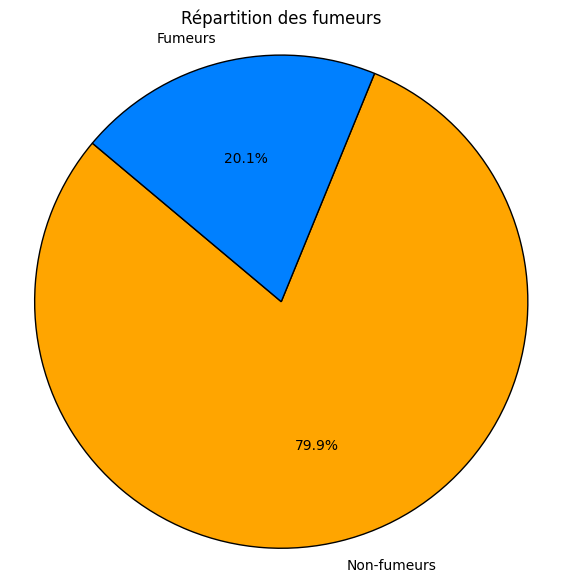

Nombre de fumeurs : 2790
Nombre de non-fumeurs : 11114


In [206]:
# Compter le nombre de fumeurs et de non-fumeurs
count_smokers = df['smoker'].value_counts()

# Labels et tailles pour le graphique
labels = ['Non-fumeurs', 'Fumeurs']
sizes = [count_smokers[0], count_smokers[1]]  # 0 pour Non-fumeurs, 1 pour Fumeurs
colors = ['#FFA500', '#0080FF'] 

# Création du diagramme en camembert
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Légende et affichage
plt.title('Répartition des fumeurs')
plt.axis('equal') 
plt.show()

# Afficher le nombre de fumeurs et non-fumeurs
print(f"Nombre de fumeurs : {count_smokers[1]}")
print(f"Nombre de non-fumeurs : {count_smokers[0]}")

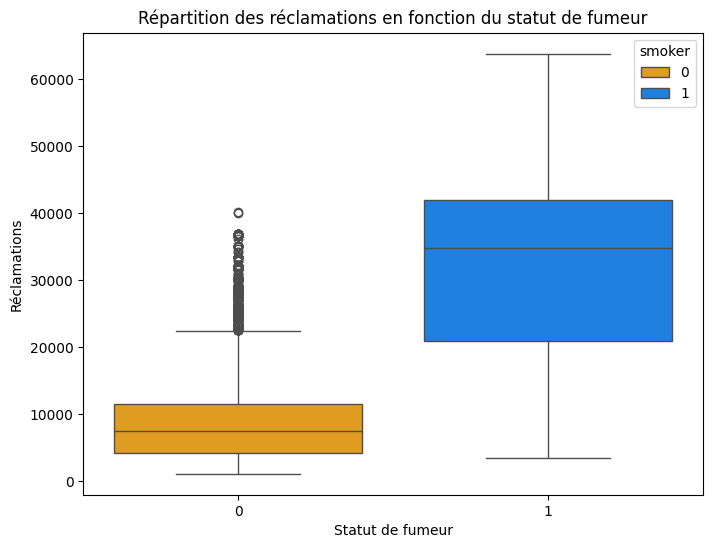

Médiane fumeurs : 34779.6
Médiane non-fumeurs : 7512.3


In [207]:
# Créer un boxplot pour les réclamations en fonction du statut de fumeur
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='claim', data=df, hue='smoker', palette={0: '#FFA500', 1: '#0080FF'}, showfliers=True)

# Légende et affichage
plt.xlabel('Statut de fumeur')
plt.ylabel('Réclamations')
plt.title('Répartition des réclamations en fonction du statut de fumeur')
plt.show()

# Médiane pour chaque groupe
median_smokers = df[df['smoker'] == 1]['claim'].median()
median_non_smokers = df[df['smoker'] == 0]['claim'].median()

# Afficher la médiane des réclamations en fonction du statut de fumeurs 
print(f"Médiane fumeurs : {median_smokers}")
print(f"Médiane non-fumeurs : {median_non_smokers}")

Bien que les fumeurs ne représentent qu’environ 20 % de la clientèle (2 972 fumeurs contre 12 028 non-fumeurs), le montant médian des réclamations des fumeurs s’élève à 34 838,9 dollars, ce qui est nettement supérieur à celui des non-fumeurs, dont la médiane est de 7 512,3 dollars.

### 5. Distribution par villes

Nous analyserons la répartition des réclamations par ville afin de comprendre comment les demandes d'indemnisation sont réparties géographiquement. Cette analyse nous permettra de déterminer si certaines villes enregistrent des réclamations plus élevées que d'autres. 

C:\Users\marin\AppData\Local\Temp\ipykernel_20208\2237214946.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




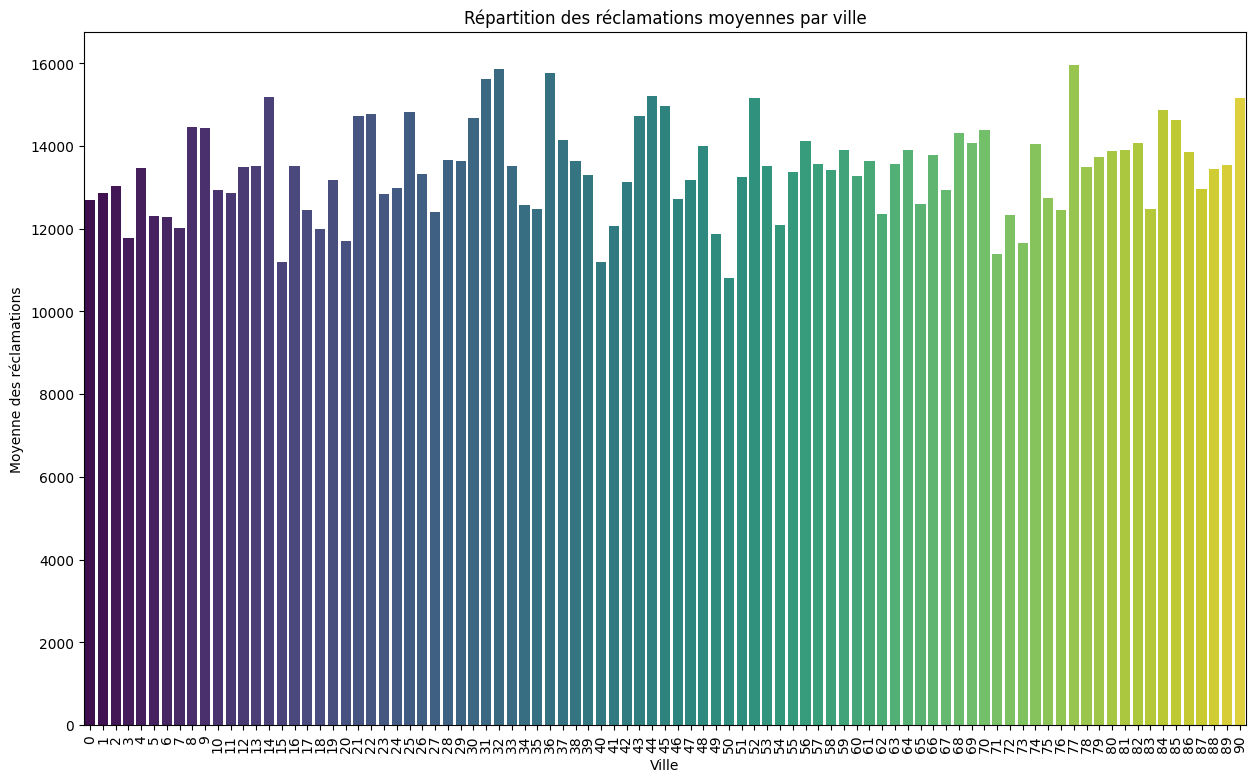

In [208]:
# Moyenne des réclamations par ville
city_claim_avg = df.groupby('city')['claim'].mean().reset_index()

# Barplot pour visualiser la moyenne des réclamations par ville
plt.figure(figsize=(15, 9))
sns.barplot(x='city', y='claim', data=city_claim_avg, palette='viridis')

# Légende et affichage
plt.title('Répartition des réclamations moyennes par ville')
plt.xlabel('Ville')
plt.ylabel('Moyenne des réclamations')
plt.xticks(rotation=90)
plt.show()

Les réclamations varient d'une ville à l'autre, indiquant une hétérogénéité dans la répartition des demandes d'indemnisation. Cette disparité pourrait être attribuée à des facteurs internes spécifiques à chaque ville.

### 6 . Distribution par maladie

Nous analyserons la répartition des réclamations en fonction des maladies afin de comprendre comment les demandes d'indemnisation sont liées aux différentes conditions de santé. Cette analyse nous permettra de déterminer quelles maladies sont associées à des réclamations plus fréquentes ou plus coûteuses.

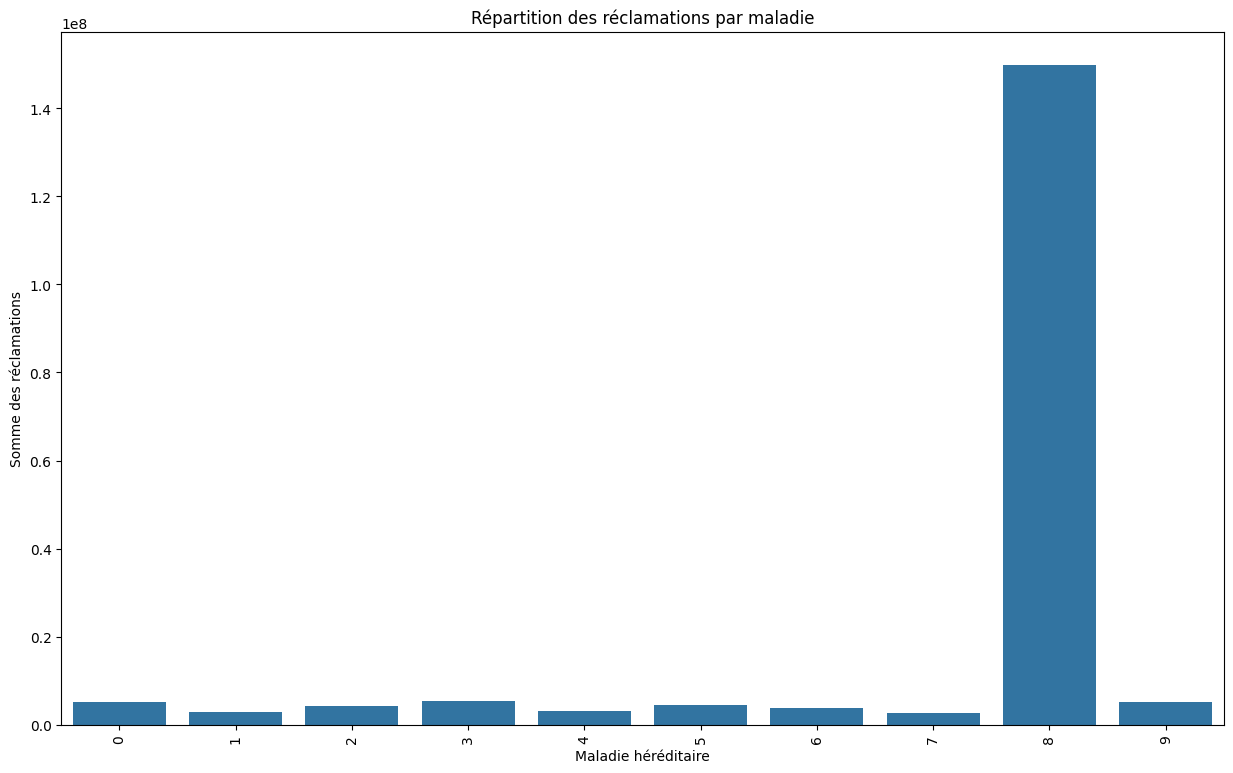

In [209]:
# Somme des réclamations par maladie
disease_claims = df.groupby('hereditary_diseases')['claim'].sum().reset_index()

# Barplot pour visualiser les réclamations par maladie
plt.figure(figsize=(15, 9))
sns.barplot(x='hereditary_diseases', y='claim', data=disease_claims)

# Légende et affichage
plt.title('Répartition des réclamations par maladie')
plt.xlabel('Maladie héréditaire')
plt.ylabel('Somme des réclamations')
plt.xticks(rotation=90)
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_20208\1558962800.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




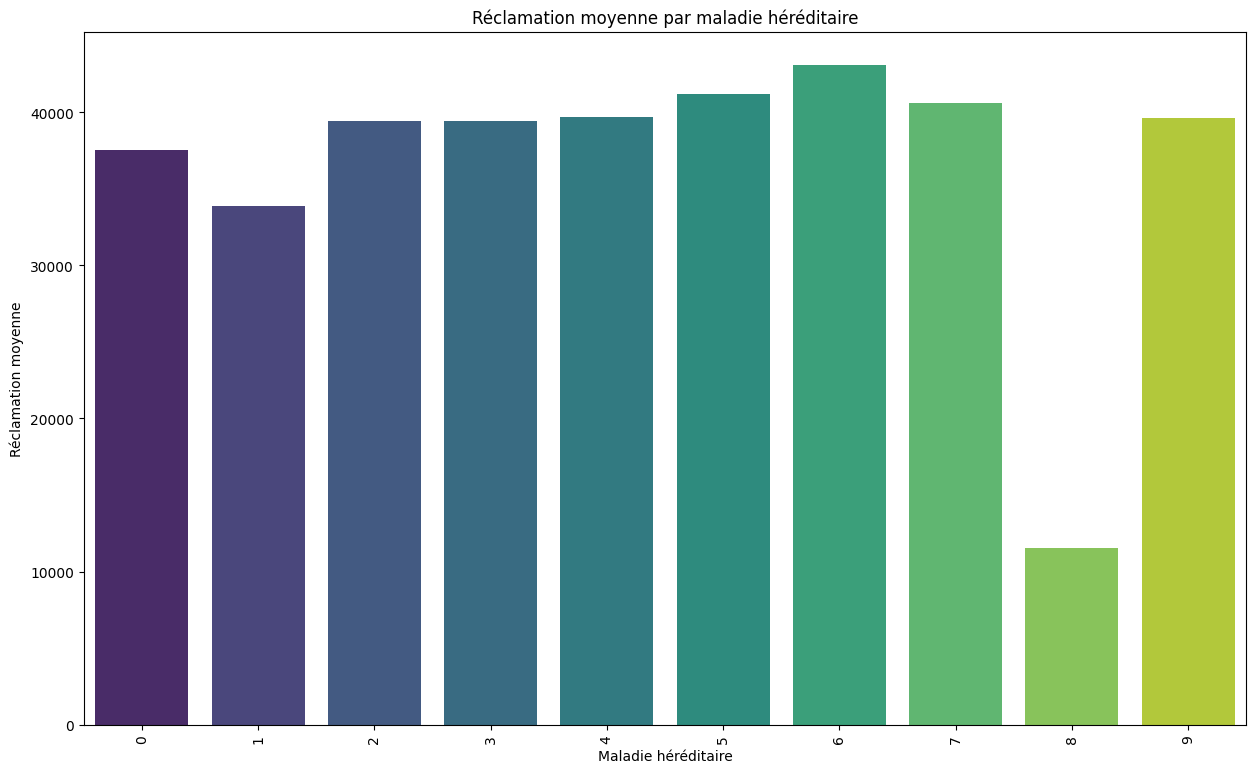

In [210]:
# Réclamation moyenne par maladie
disease_avg_claims = df.groupby('hereditary_diseases')['claim'].mean().reset_index()

# Barplot pour visualiser la réclamation moyenne par maladie
plt.figure(figsize=(15, 9))
sns.barplot(x='hereditary_diseases', y='claim', data=disease_avg_claims, palette='viridis')

# Légende et affichage
plt.title('Réclamation moyenne par maladie héréditaire')
plt.xlabel('Maladie héréditaire')
plt.ylabel('Réclamation moyenne')
plt.xticks(rotation=90)
plt.show()

Le montant total des réclamations est significativement plus élevé pour les clients non malades (disease 8). Toutefois, l'analyse des réclamations moyennes par maladie montre que les clients atteints de certaines pathologies enregistrent des réclamations plus élevées en comparaison avec les non-malades. Cette différence peut être expliquée par la proportion plus importante de non-malades dans la population étudiée.

### 8 . Distribution par métiers

Nous analyserons la répartition des réclamations en fonction des métiers afin de comprendre comment les différentes professions sont associées aux demandes d'indemnisation. Cette analyse nous permettra de déterminer si certains métiers sont plus susceptibles de générer des réclamations.

C:\Users\marin\AppData\Local\Temp\ipykernel_20208\2510756852.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




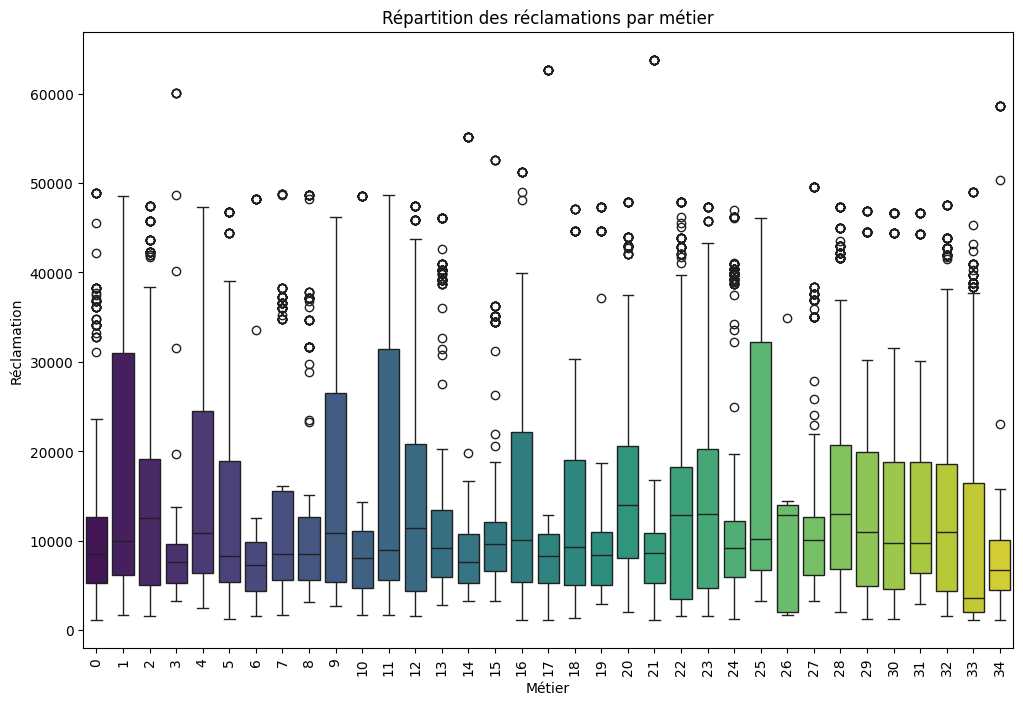

In [211]:
# Boxplot pour visualiser la répartition des réclamations par métier
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_title', y='claim', data=df, palette='viridis')

# Légende et affichage
plt.title('Répartition des réclamations par métier')
plt.xlabel('Métier')
plt.ylabel('Réclamation')
plt.xticks(rotation=90)
plt.show()

L'analyse des réclamations par métier révèle une grande hétérogénéité dans la répartition des montants. Certains métiers présentent des réclamations particulièrement élevées, avec des médianes proches de 30 000 ou même au-delà, tandis que d'autres métiers affichent des montants bien plus bas.

En outre, les outliers présents pour plusieurs métiers, avec des réclamations exceptionnellement élevées, suggèrent qu'il existe des cas particuliers où les réclamations sont bien plus importantes que la moyenne. Ces cas pourraient découler de situations exceptionnelles. 

### 9. Matrice de corrélation

Enfin, nous créerons une matrice de corrélation pour visualiser les relations entre les caractéristiques numériques. Cela nous permettra d'identifier les variables qui sont fortement corrélées entre elles, ce qui pourrait influencer notre modèle d'apprentissage automatique.

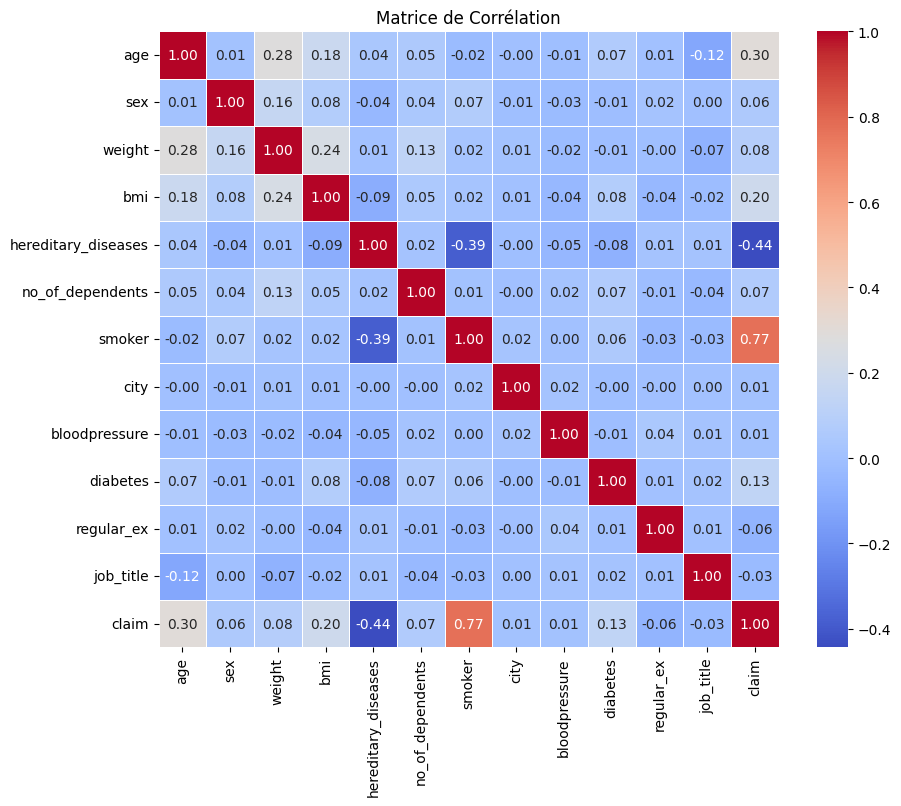

In [212]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()


L’analyse de la matrice de corrélation met en évidence plusieurs relations entre les variables et les réclamations.

Tout d'abord, le statut de fumeur (smoker) est fortement corrélé avec les réclamations, avec une corrélation de 0.77. Cela suggère qu'il existe une association marquée entre le tabagisme et un montant élevé de réclamations, ce qui pourrait être dû aux risques de santé accrus associés au tabagisme, entraînant des coûts médicaux et des réclamations plus fréquentes.

De plus, l'âge des individus montre une corrélation modérée de 0.30 avec les réclamations, ce qui peut indiquer que les personnes plus âgées ont des réclamations plus importantes. Cela pourrait être lié à une augmentation des problèmes de santé avec l'âge, générant ainsi des coûts de réclamation plus élevés.

L'indice de masse corporelle (bmi) est également positivement corrélé avec les réclamations (0.20), ce qui suggère que les personnes ayant un indice de masse corporelle plus élevé pourraient être plus enclines à faire des réclamations, possiblement en raison de conditions de santé liées à l'obésité.

En revanche, les maladies héréditaires présentent une corrélation négative modérée avec les réclamations (-0.44), ce qui pourrait indiquer que les personnes ayant des antécédents familiaux de maladies pourraient avoir des réclamations moins fréquentes ou moins coûteuses. Cette relation pourrait être liée à des comportements de prévention ou des traitements médicaux plus réguliers dans ces groupes.

D'autres variables, telles que le diabète et l'hypertension artérielle (blood pressure), montrent des corrélations faibles avec les réclamations, ce qui suggère que ces conditions de santé ne semblent pas influencer directement le montant des réclamations dans cet ensemble de données.

Enfin, le métier (job_title) présente une corrélation faible avec les réclamations (-0.03), indiquant que le type de travail n'a pas un impact significatif sur le montant des réclamations.

## III. Modélisation des réclamations d'assurance

Dans cette section, nous allons nous concentrer sur la modélisation des réclamations d'assurance. Nous sélectionnerons les caractéristiques pertinentes, diviserons les données en ensembles d'entraînement et de test, et choisirons différents modèles de prédiction pour évaluer leur performance et leur capacité à prédire avec précision les réclamations d'assurance.

### 1. Sélection des caractéristiques pertinentes

Cette étape consiste à identifier les variables les plus influentes pour prédire les réclamations, en s'appuyant sur des critères statistiques et métiers afin d'optimiser la performance des modèles de prédiction.

In [ ]:
# Séparation des données : X (caractéristiques) et y (variable cible)
X = df.drop("claim", axis=1)  # Toutes les colonnes sauf CLAIM
y = df["claim"]  # La variable cible

# Sélection des meilleures caractéristiques 
selector = SelectKBest(f_regression, k=8)
selector.fit(X, y)

# Transformation des données : appliquer la sélection sur les données X
X_new = selector.transform(X)

# Afficher les caractéristiques sélectionnées
selected_features = df.columns[selector.get_support(indices=True)].tolist()
print("Caractéristiques sélectionnées:", selected_features)

Caractéristiques sélectionnées: ['age', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'diabetes', 'regular_ex']


### 2. Diviser les données en ensembles d'entraînement et de test

Dans cette section, nous allons diviser les données en ensembles d'entraînement et de test et d'évaluation. Cette étape est importante pour évaluer la performance de nos modèles de manière objective, en garantissant que ceux-ci soient capables de généraliser correctement à de nouvelles données non vues lors de l'entraînement.

In [244]:

# Diviser les données en ensembles d'entraînement (85%) et le reste (15% pour validation et test)
X_train, X_temp, y_train, y_temp = train_test_split(X_new, y, test_size=0.15, random_state=42)

# Diviser le reste (15%) en validation (10%) et test (5%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 0.33 * 15% = 5%

Sélection des meilleures caractéristiques :

L'utilisation de SelectKBest permet de ne garder que les caractéristiques les plus pertinentes pour la prédiction. Cela permet de :

- Réduire la complexité du modèle en éliminant les variables inutiles.
- Améliorer les performances du modèle en réduisant le risque de surapprentissage.
- Gagner du temps lors de l'entraînement et de l'évaluation du modèle.

### 3. Choix des modèles de prédiction

- Régression Linéaire
- Gradient Boosting Regressor
- Random Forest Regressor
- Support Vector Regressor (SVR)

In [245]:
# --- 1. Régression Linéaire ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# --- 2. Gradient Boosting Regressor ---
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# --- 3. Random Forest Regressor ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- 4. Support Vector Regressor (SVR) ---
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

### 4. Évaluation des performances des modèles

Dans cette section, nous évaluerons les performances des modèles de prédiction en utilisant des métriques telles que l'erreur quadratique moyenne (RMSE), le coefficient de détermination (R²) et l'erreur absolue moyenne (MAE). Cette étape nous permettra de comparer l'efficacité des différents modèles et de choisir celui qui offre les meilleures prédictions pour les réclamations d'assurance.

In [246]:
# --- 1. Régression Linéaire ---
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Régression Linéaire :")
print(f"MSE : {mse_lr}")
print(f"MAE : {mae_lr}")
print(f"R² : {r2_lr}\n")

# --- 2. Gradient Boosting Regressor ---
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor :")
print(f"MSE : {mse_gb}")
print(f"MAE : {mae_gb}")
print(f"R² : {r2_gb}\n")

# --- 3. Random Forest Regressor ---
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor :")
print(f"MSE : {mse_rf}")
print(f"MAE : {mae_rf}")
print(f"R² : {r2_rf}\n")

# --- 4. Support Vector Regressor (SVR) ---
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor (SVR) :")
print(f"MSE : {mse_svr}")
print(f"MAE : {mae_svr}")
print(f"R² : {r2_svr}\n")

Régression Linéaire :
MSE : 36715945.66411152
MAE : 4113.471411971132
R² : 0.766672398908773

Gradient Boosting Regressor :
MSE : 20118265.445833545
MAE : 2654.692089900195
R² : 0.8721496469807335

Random Forest Regressor :
MSE : 3882886.0535799437
MAE : 276.654796165953
R² : 0.9753244953437776

Support Vector Regressor (SVR) :
MSE : 174550502.13097924
MAE : 8489.50107778959
R² : -0.1092578223117937



- Le **MSE** mesure l'écart entre les valeurs réelles et les valeurs prédites par le modèle. Plus le MSE est faible, plus les prédictions sont proches des vraies valeurs (un MSE plus faible = une meilleure performance en termes de précision des prédictions).
- Le **R²** indique quelle proportion de la variance de la variable cible est expliquée par le modèle (proche de 1 = modèle très performant, proche de 0 = pas de variance expliquée).
- Le **MAE** mesure la moyenne des différences absolues entre les valeurs prédites par le modèle et les valeurs réelles. Plus le MAE est faible, plus les prédictions sont proche des valeurs réelles.

Le modèle **Random Forest Regressor** présente la meilleure performance avec un R² de 0.972, indiquant une excellente explication de la variance des réclamations (97,5% d'explication de la variance), et des MSE et MAE plus faible que les autres méthodes, confirmant la précision supérieure de ses prédictions. 

### 5. Analyse des résidus et validation du modèle

Dans cette section, nous allons analyser les résidus du modèle afin de vérifier la qualité de la prédiction et d’évaluer l’adéquation du modèle aux données. Cette étape est cruciale pour s'assurer que les erreurs de prédiction sont aléatoires et non structurées, ce qui confirmerait la validité du modèle choisi.

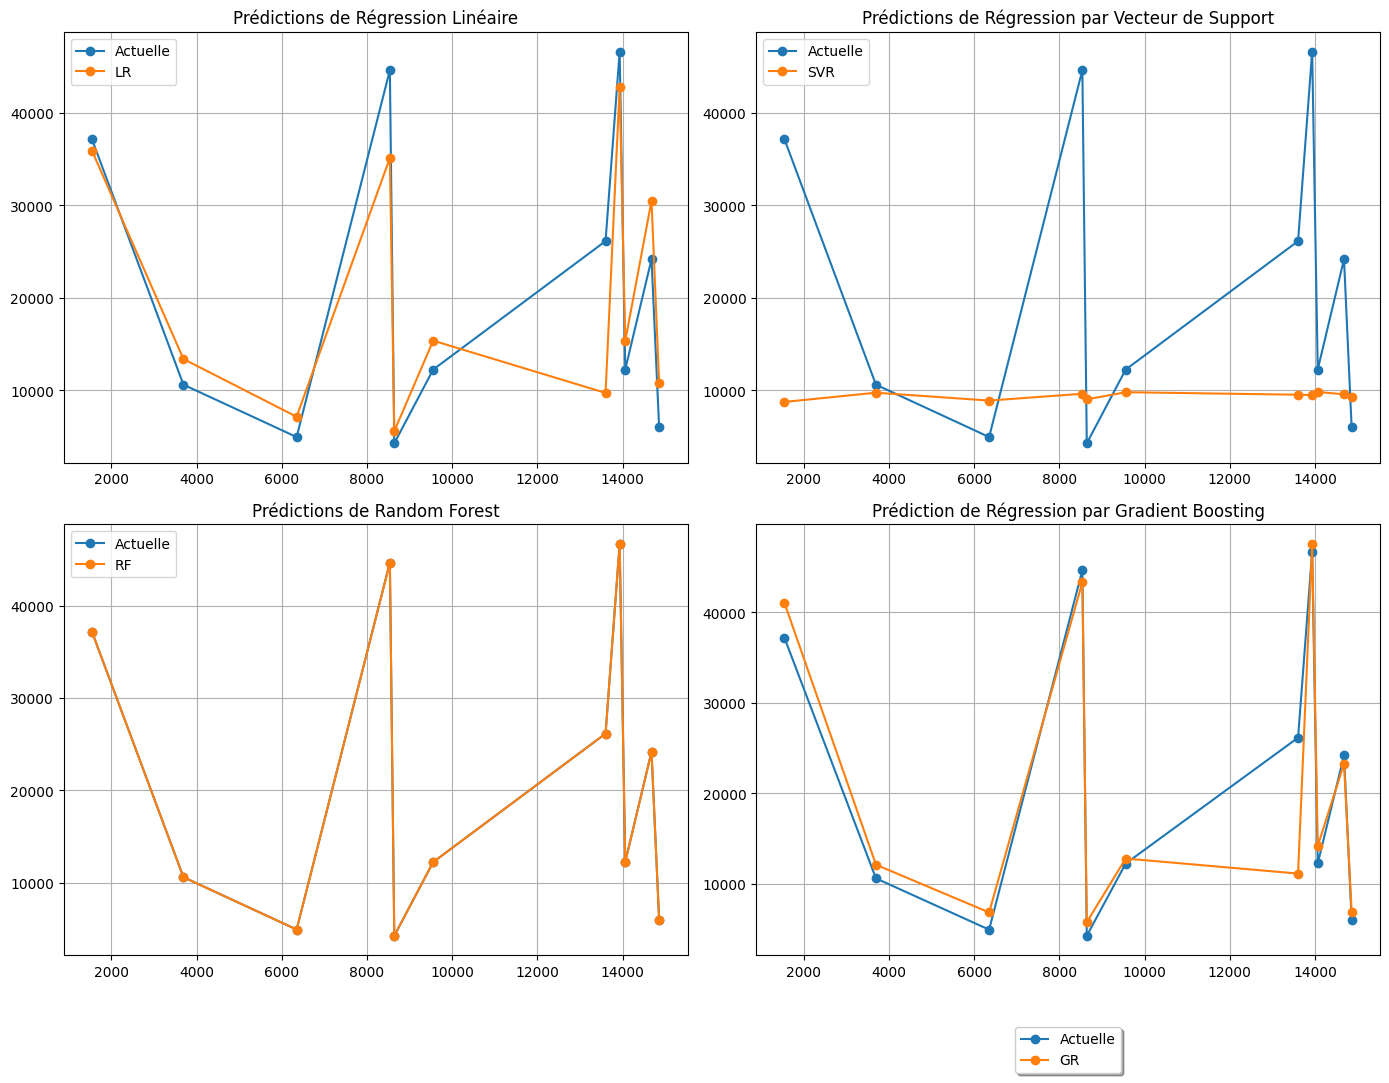

In [215]:
# Création du DataFrame et tri selon les valeurs de l'index
df1 = pd.DataFrame({
    'Actuelle': y_test, 
    'LR': y_pred_lr, 
    'SVR': y_pred_svr, 
    'RF': y_pred_rf, 
    'GR': y_pred_gb
}).iloc[0:11].sort_index()  # Tri selon l'index

plt.figure(figsize=(14, 10))

# Régression linéaire
plt.subplot(221)
plt.plot(df1.index, df1['Actuelle'], label='Actuelle', marker='o')
plt.plot(df1.index, df1['LR'], label="LR", marker='o')
plt.legend()
plt.title('Prédictions de Régression Linéaire')
plt.grid(True)

# Regression vectoriel
plt.subplot(222)
plt.plot(df1.index, df1['Actuelle'], label='Actuelle', marker='o')
plt.plot(df1.index, df1['SVR'], label="SVR", marker='o')
plt.legend()
plt.title('Prédictions de Régression par Vecteur de Support')
plt.grid(True)

# Random Forest
plt.subplot(223)
plt.plot(df1.index, df1['Actuelle'], label='Actuelle', marker='o')
plt.plot(df1.index, df1['RF'], label="RF", marker='o')
plt.legend()
plt.title('Prédictions de Random Forest')
plt.grid(True)

# Gradient Boosting
plt.subplot(224)
plt.plot(df1.index, df1['Actuelle'], label='Actuelle', marker='o')
plt.plot(df1.index, df1['GR'], label="GR", marker='o')
plt.title('Prédiction de Régression par Gradient Boosting')
plt.grid(True)

plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

Le choix du modèle **Random Forest** est conforté par le graphique où les courbes des valeurs réelles et prédites sont presque confondues.

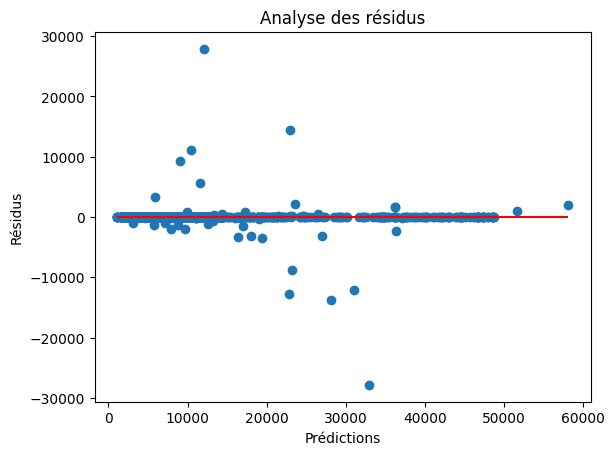

In [216]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.hlines(0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='red')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Analyse des résidus')
plt.show()


L'analyse des résidus permet d'évaluer la qualité de l'ajustement du modèle en mesurant la différence entre les valeurs observées et les valeurs prédites. Elle joue un rôle clé dans l'identification de biais potentiels, la détection d'outliers ou d'anomalies, ainsi que dans la vérification du respect des hypothèses sous-jacentes telles que la normalité et l'homoscédasticité des erreurs. Cela permet de s'assurer que les prédictions du modèle sont à la fois fiables et robustes.

De manière générale, les résidus sont bien centrés autour de zéro, ce qui indique un ajustement adéquat du modèle. Toutefois, certains points s'écartent de manière exceptionnelle. Ces points éloignés pourraient correspondre à des cas rares ou particuliers qui ne suivent pas les tendances générales des données. Dans le contexte de la prédiction des réclamations d'assurance, il est possible que ces points représentent des réclamations extrêmement élevées ou faibles, qui ne sont pas représentatives de la majorité des assurés.

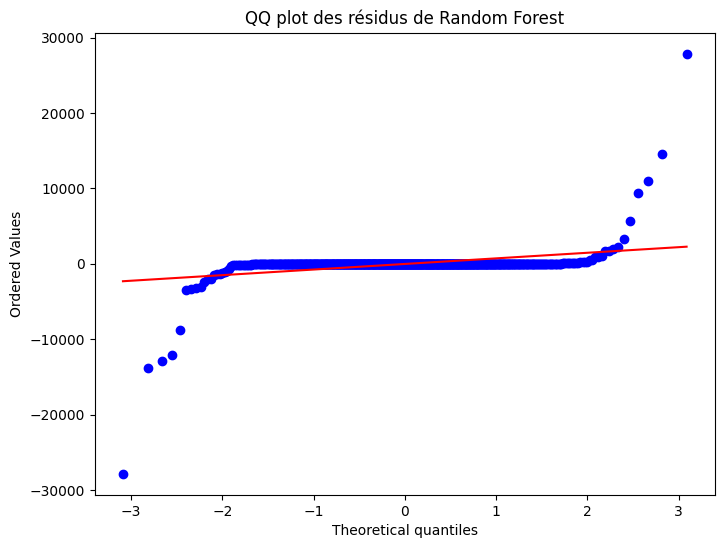

In [217]:
import scipy.stats as stats

# QQ plot des résidus
plt.figure(figsize=(8,6))
stats.probplot(residus_rf, dist="norm", plot=plt)
plt.title('QQ plot des résidus de Random Forest')
plt.show()


L'analyse du QQ plot montre que les points sont globalement bien alignés sur la droite rouge, ce qui indique que la majorité des résidus suivent une distribution normale. Cependant, on observe des écarts aux extrémités, suggérant la présence de queues plus épaisses et de valeurs extrêmes. Cela indique que bien que la distribution des résidus soit globalement normale, il existe quelques observations rares ou extrêmes qui ne sont pas bien capturées par le modèle (outlier).

### 6. Evaluation du modèle

Dans cette section, nous allons évaluer les performances des modèles en utilisant l'ensemble de données réservé pour les tests. Nous calculerons des métriques telles que l'erreur absolue moyenne (MAE), l'erreur quadratique moyenne (RMSE), et le coefficient de détermination R² afin de mesurer la précision des prédictions de nos modèles sur les données non vues pendant l'entraînement. Cela nous permettra de vérifier l'efficacité du modèle sélectionné et d'assurer sa capacité à généraliser sur de nouvelles données.

In [218]:
# Prédictions sur le jeu de validation
y_pred_val = rf_model.predict(X_val)

# Calcul des métriques de performance
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

# Affichage des résultats
print("Performance sur le jeu de validation :")
print(f"MSE : {mse_val}")
print(f"MAE : {mae_val}")
print(f"R² : {r2_val}")


Performance sur le jeu de validation :
MSE : 4891707.084445253
MAE : 417.1714159342505
R² : 0.9670314294143403


Les résultats obtenus sur le jeu de validation **X_val** sont très satisfaisants, avec un R² de 0.96 et un MAE faible, ce qui confirme la pertinence et la robustesse de ce modèle pour la prédiction des réclamations. Nous validons donc l'utilisation de ce modèle.

               Feature  Importance
5               smoker    0.594626
2                  bmi    0.153612
0                  age    0.126918
1               weight    0.047385
3  hereditary_diseases    0.027791
6             diabetes    0.023184
4     no_of_dependents    0.018576
7           regular_ex    0.007908


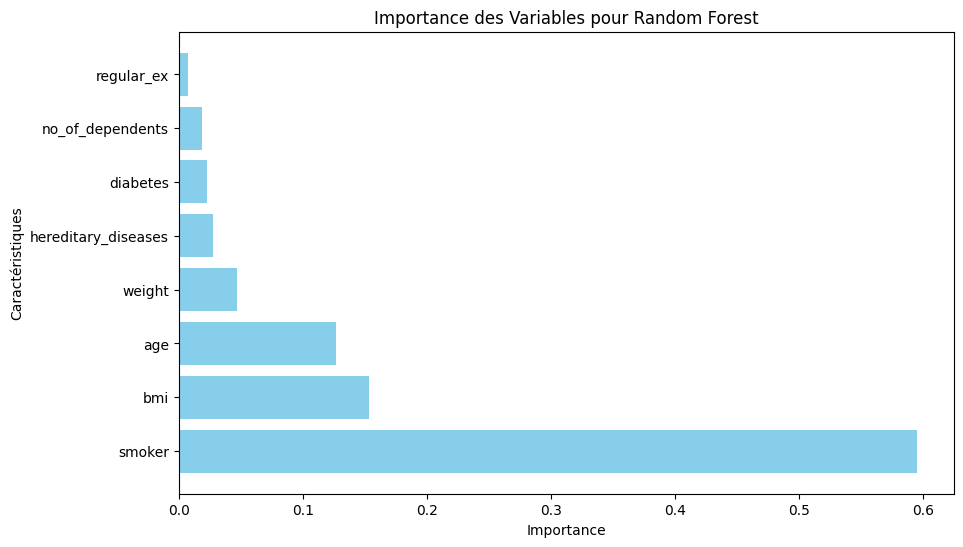

In [224]:
# Récupérer l'importance des variables du modèle Random Forest
importances = rf_model.feature_importances_

# Créer un DataFrame avec les importances et les noms des variables
feature_importance_df = pd.DataFrame({
    'Feature': selected_features, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher l'importance des variables
print(feature_importance_df)

# Visualiser l'importance des variables
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Importance des Variables pour Random Forest')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()


Le modèle attribue une importance significative à la variable "smoker" (fumeur), suivie par l'indice de masse corporelle (BMI), l'âge et le poids, indiquant que ces facteurs liés à la santé et à la démographie influencent fortement la prédiction. Les variables comme les antécédents familiaux de maladies, le diabète, le nombre de personnes à charge et l'exercice régulier ont un impact beaucoup plus faible sur la variable cible.

### Conclusion

Cette analyse des réclamations d'assurance a permis d'obtenir des insights significatifs sur les facteurs influençant le montant des réclamations, ainsi que d'évaluer la performance de plusieurs modèles de machine learning pour prédire ces montants.

Insights clés :

Des variables telles que l'âge, le tabagisme, l'indice de masse corporelle (BMI) ont montré des liens forts avec le montant des réclamations. Ces résultats suggèrent que les personnes plus âgées ou ayant des comportements à risque (comme fumer) sont plus susceptibles de générer des réclamations élevées.
Ces facteurs peuvent être utilisé pour affiner les stratégies de prévention et de gestion des risques dans les assurances.

Modèle de prédiction des réclamations :

Meilleure performance avec Random Forest :
Parmi les différents modèles testés, Random Forest Regressor a montré les meilleures performances avec un R² de 97,5%, ce qui signifie que le modèle est capable d'expliquer une grande partie de la variance des réclamations. Il a aussi produit les plus faibles erreurs de prédiction (MSE et MAE), ce qui atteste de sa précision.

Validation et performance :
Les résultats de la validation ont confirmé la robustesse du modèle avec un R² élevé de 0.96, démontrant ainsi qu'il est capable de prédire de manière fiable les réclamations, même sur des données non vues précédemment.